# Load airbnb.csv data:

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (12,12)

In [2]:
airbnb = pd.read_csv("data/airbnb.csv")

In [3]:
airbnb.shape

(13232, 9)

In [4]:
airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


# Initial processing of data: 

In [5]:
airbnb.dtypes

room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
dtype: object

Data Dictionary

room_id                   int64

host_id                   int64

room_type                object

neighborhood             object

reviews                   int64

overall_satisfaction    float64

accommodates              int64

bedrooms                float64

price                   float64

dtype: object


# Data Quality Assurance:

Drop duplicates


In [6]:
airbnb[airbnb.duplicated()].shape

(0, 9)

In [8]:
airbnb = airbnb.drop_duplicates()
airbnb.shape

(13232, 9)

In [9]:
airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


Now we need to check if there are variables with many repeated values (cardinality).

In [10]:
n_records = len(airbnb)
def duplicate_values_col(df):
    for column in df:
        column_counts = df[column].value_counts()
        most_common = column_counts.iloc[0]
        least_common = column_counts.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[column].name,
            round(most_common / (1.0 * n_records),3),
            round(least_common / (1.0 * n_records),3),
            df[column].dtype
        ))

duplicate_values_col(airbnb)

room_id | 0.0-0.0 | int64
host_id | 0.013-0.0 | int64
room_type | 0.738-0.013 | object
neighborhood | 0.211-0.002 | object
reviews | 0.175-0.0 | int64
overall_satisfaction | 0.348-0.0 | float64
accommodates | 0.303-0.001 | int64
bedrooms | 0.557-0.001 | float64
price | 0.059-0.0 | float64


Normalize (Count In Each Column)

In [10]:
airbnb.room_type.value_counts(normalize=True)

Entire home/apt    0.737908
Private room       0.249169
Shared room        0.012923
Name: room_type, dtype: float64

In [13]:
airbnb.neighborhood.value_counts(normalize=True)

Santa Maria Maior          0.211457
Misericórdia               0.181530
Arroios                    0.125756
Santo António              0.083510
São Vicente                0.078673
Estrela                    0.060686
Avenidas Novas             0.042775
Penha de França            0.030759
Campo de Ourique           0.024108
Areeiro                    0.021161
Belém                      0.019196
Alvalade                   0.019120
Parque das Nações          0.018894
Alcântara                  0.016097
São Domingos de Benfica    0.010429
Lumiar                     0.009371
Campolide                  0.009296
Olivais                    0.008162
Ajuda                      0.008162
Beato                      0.006348
Benfica                    0.005366
Marvila                    0.003854
Carnide                    0.003552
Santa Clara                0.001738
Name: neighborhood, dtype: float64

Data Visualization

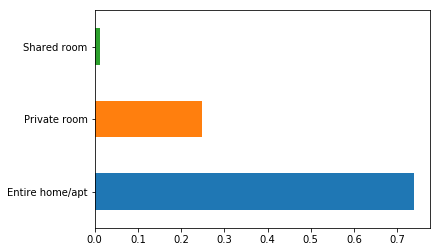

In [14]:
airbnb.room_type.value_counts(normalize=True).plot.barh();

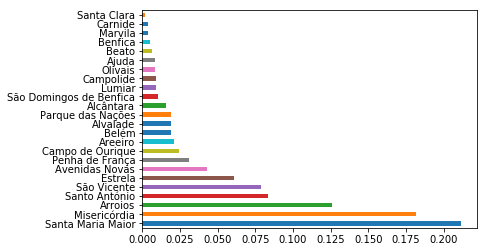

In [15]:
airbnb.neighborhood.value_counts(normalize=True).plot.barh();

Missing Values

In [16]:
n_records = len(airbnb)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(airbnb)

room_id | 0.0 | int64
host_id | 0.0 | int64
room_type | 0.0 | object
neighborhood | 0.0 | object
reviews | 0.0 | int64
overall_satisfaction | 0.0007557436517533253 | float64
accommodates | 0.0 | int64
bedrooms | 0.0 | float64
price | 0.0 | float64


Extreme Values (Outliers)

In [11]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(airbnb)

room_id | 0 | int64
host_id | 0 | int64
reviews | 296 | int64
overall_satisfaction | 0 | float64
accommodates | 231 | int64
bedrooms | 258 | float64
price | 121 | float64


/Users/karinadandia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


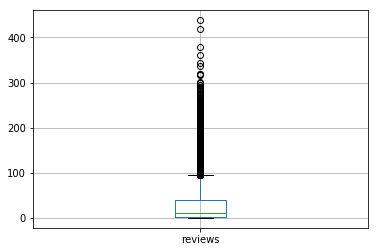

In [12]:
airbnb.boxplot(column='reviews');

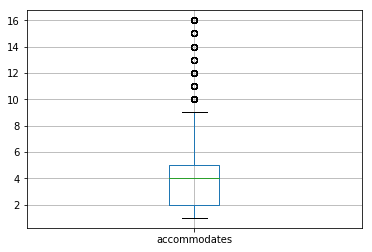

In [14]:
airbnb.boxplot(column='accommodates');

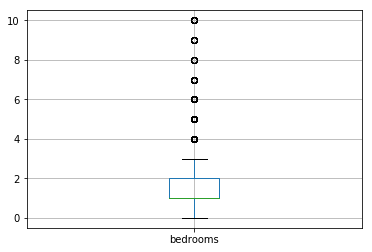

In [16]:
airbnb.boxplot(column='bedrooms');

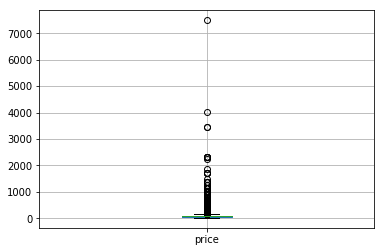

In [17]:
airbnb.boxplot(column='price');

Conclusion: 
- There were no duplicates in the data set. 
- Only the overall satisfaction has few missing values (0.07%)
- There are a few columns with extreme values (outliers): reviews, accommodates, bedrooms, and price. 


# Variable Grouping:

Categorical Variable Grouping

In [18]:
def cardinality_categorical(df):
    n_records = len(df)
    for column in df.select_dtypes([object]):
        print("{} | uniques/records: {:.3f} | Minimum observations: {:.3f}".format(
            column, 
            len(df[column].unique())/n_records,
            df[column].value_counts().min()
        ))        

cardinality_categorical(airbnb)

room_type | uniques/records: 0.000 | Minimum observations: 171.000
neighborhood | uniques/records: 0.002 | Minimum observations: 23.000


In [19]:
airbnb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [20]:
airbnb.neighborhood.unique()

array(['Belém', 'Alvalade', 'Santa Maria Maior', 'Estrela', 'Alcântara',
       'Misericórdia', 'Avenidas Novas', 'Lumiar', 'São Vicente',
       'Campo de Ourique', 'Santo António', 'São Domingos de Benfica',
       'Parque das Nações', 'Penha de França', 'Arroios', 'Beato',
       'Campolide', 'Benfica', 'Areeiro', 'Ajuda', 'Carnide', 'Olivais',
       'Santa Clara', 'Marvila'], dtype=object)

Conclusion:
- The categorical columns do not need to be grouped further because the groupings make sense for the columns. 

Continuous Variable Grouping: Lets group the price column.

- room_id int64
- host_id int64
- reviews int64
- overall_satisfaction float64
- accommodates int64
- bedrooms float64
- price float64

In [22]:
airbnb.head(10)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0
5,29720,128075,Entire home/apt,Estrela,14,5.0,16,9.0,1154.0
6,29872,128698,Entire home/apt,Alcântara,25,5.0,2,1.0,75.0
7,29891,128792,Entire home/apt,Misericórdia,28,5.0,3,1.0,49.0
8,29915,128890,Entire home/apt,Avenidas Novas,28,4.5,3,1.0,58.0
9,33312,144398,Entire home/apt,Misericórdia,24,4.5,4,1.0,66.0


In [23]:
price_type = ['very low', 'low', 'moderate', 'high', 'very high']

airbnb['price_type'] = pd.qcut(airbnb['price'],
                                  5, price_type)

In [24]:
airbnb.head(10)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,price_type
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0,low
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0,low
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0,moderate
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0,low
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0,moderate
5,29720,128075,Entire home/apt,Estrela,14,5.0,16,9.0,1154.0,very high
6,29872,128698,Entire home/apt,Alcântara,25,5.0,2,1.0,75.0,moderate
7,29891,128792,Entire home/apt,Misericórdia,28,5.0,3,1.0,49.0,low
8,29915,128890,Entire home/apt,Avenidas Novas,28,4.5,3,1.0,58.0,low
9,33312,144398,Entire home/apt,Misericórdia,24,4.5,4,1.0,66.0,moderate


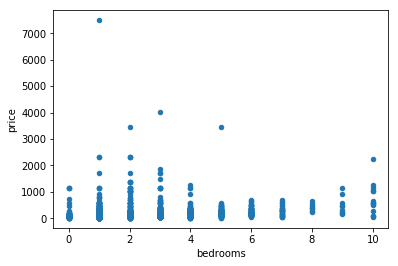

In [27]:
airbnb.plot.scatter(x="bedrooms",y="price");

Conclusion: We see that the price does not change much based on the number of bedrooms available. 

Create new file for the data

In [29]:
airbnb.to_pickle("data/airbnb.exploratory.assignment1.pkl")